In [2]:
import segmentation_models_pytorch as smp

import torch



In [4]:
smp.Unet('mobilenet_v2', encoder_weights=None, decoder_attention_type='scse')

Unet(
  (encoder): MobileNetV2Encoder(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1

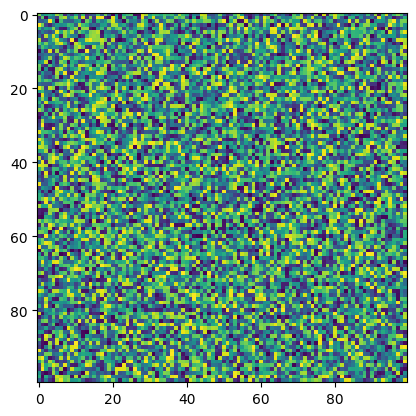

In [91]:
plt.imshow((beta.rvs(a=1, b=1, size=(100, 100)) * 255.).astype(np.uint8))

In [29]:
sv = cv2.imread('../data_4_folds/train/1/surface_volume/32.tif', cv2.IMREAD_GRAYSCALE)
mask = cv2.imread('../data_4_folds/train/1/mask.png', cv2.IMREAD_GRAYSCALE)

In [45]:
np.random.shuffle(sv_flatten)

In [47]:
sv_flatten = sv_flatten[:5_000_000]

In [30]:
sv_flatten = sv.flatten()[mask.flatten() != 0] / 255

In [31]:
sv_flatten

array([0.        , 0.        , 0.        , ..., 0.34509804, 0.34509804,
       0.34509804])

In [48]:
sv_flatten -= 1e-10*(sv_flatten == 1)
sv_flatten += 1e-10*(sv_flatten == 0)

In [49]:
sv_flatten[sv_flatten == 1]

array([], dtype=float64)

In [50]:
fbeta = mmp(sv_flatten, 0.5, 0.5)

In [77]:
def fun(x):
    if x[1] <= 0 or x[0] <= 0:
        return 1e50
    fbeta = mmp(sv_flatten, x[0], x[1])
    
    return -fbeta

In [78]:
import scipy

In [86]:
scipy.optimize.minimize(fun, (3.244e+00,  5.449e+00))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -2327853.2604347486
        x: [ 3.244e+00  5.449e+00]
      nit: 6
      jac: [ 1.250e-01  1.250e-01]
 hess_inv: [[ 2.660e-09 -1.164e-09]
            [-1.164e-09  6.071e-08]]
     nfev: 42
     njev: 14

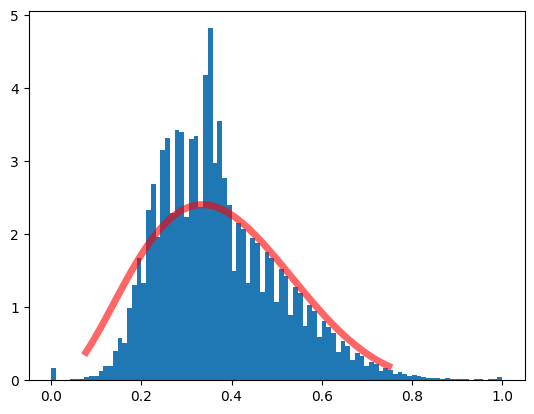

In [85]:
plt.hist(sv_flatten, bins=95, density=True)
plt.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')

In [80]:
a, b = (3.244e+00,  5.449e+00)

In [81]:
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)

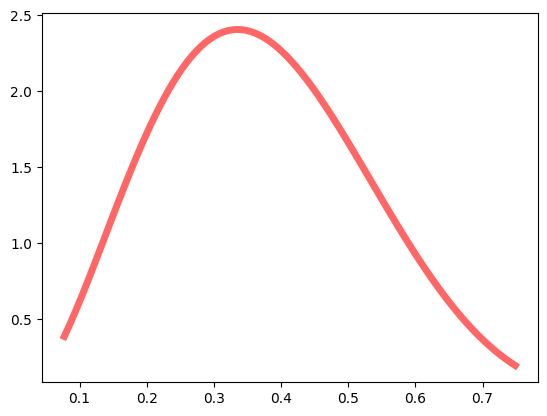

In [82]:
plt.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')